# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Monday) 11:00 pm </b> </font>

<font color="blue"> Anonymous </font>

# Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.
<br>
<br>
<br>

This assignment is designed to understand the internal working of the Linear Regression model for Machine Learning. By the end of the assignment we must be familiar with the meaning of the terms Supervised Learning, Input data and Target variables, training samples, hypotheses and prediction of new data. 

We implement two Linear Regression models using the two different metrics - Least Squares and Least Mean Squares. 

We understand how the model trains the input data along with the target variables ( Supervised Learning ) and then uses the model to predict future values. 

We learn how to preprocess and clean data found from different sources and feed it into the Linear Regression Model for training. 

We use this model to plot the prediction model that is ready to predict for new values. 

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0. 

### INTRODUCTION OF DATA 

The data set is simulated with the following attributes


    Satisfaction Level - How satisfied the employees are on a scale of 0 - 1
    Last evaluation - The score on their last evalutaion on a scale of 0 - 1 
    Number of projects - projects completed
    Average monthly hours - average of the worked hours in a month
    Time spent at the company - number of years spent in the company 
    Whether they have had a work accident - Yes/No 
    Whether they have had a promotion in the last 5 years - Yes/No
    Departments (column sales) - Department of the employee
    Salary - Salary range ( LOW < MEDIUM < HIGH )
    Whether the employee has left - Yes/No 
    
#### The dataset can be used to find out about the correlation of the various attrbutes with each other and to compute the risk of attrition of the company which can be useful to the executive management of the company in managing the Human Resources. We can see the relationship of each of the variables with the target variable 'Satisfaction Level' and design a regression model. We can also select the most significant and least significant features. 

Source : 

### PREPROCESSING THE DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [71]:
df = pd.read_csv("HR_comma_sep.csv")

In [3]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import plot

In [4]:
df.shape #Number of rows x columns of the dataset 

(14999, 10)

In [72]:
df = df.rename(columns={'sales': 'department',}) 
#Renaming the column name to "department", as "Sales" is one of the departments

In [6]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_years,Work_accident,left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_years,Work_accident,left_company,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
#Checking for missing values
df.isnull().sum()

#We observe that there are no missing values to handle 

satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours        0
time_spend_company_years    0
Work_accident               0
left_company                0
promotion_last_5years       0
department                  0
salary                      0
dtype: int64

In [45]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [47]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [51]:
deptdic = {b'sales': 1, b'accounting':2, b'hr':3, b'technical':4, b'support':5, b'management':6, 
            b'IT': 7, b'product_mng':8, b'marketing':9, b'RandD':10}
saldic = {b'low': 1, b'medium':2, b'high':3}

def dept_conv(s):
    return deptdic[s]

def sal_conv(s):
    return saldic[s]

dat = np.loadtxt("HR_comma_sep.csv", delimiter=',', skiprows=1,
                 converters={8:dept_conv, 9:sal_conv})
dat

array([[ 0.38,  0.53,  2.  , ...,  0.  ,  1.  ,  1.  ],
       [ 0.8 ,  0.86,  5.  , ...,  0.  ,  1.  ,  2.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  1.  ,  2.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  0.  ,  5.  ,  1.  ],
       [ 0.11,  0.96,  6.  , ...,  0.  ,  5.  ,  1.  ],
       [ 0.37,  0.52,  2.  , ...,  0.  ,  5.  ,  1.  ]])

In [52]:
np.any(np.isnan(dat))

False

In [73]:
newdf = df
newdf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [74]:
#Coverting strings to numbers in the pandas dataframe
deptdic = {'sales': 1, 'accounting':2, 'hr':3, 'technical':4, 'support':5, 'management':6, 
            'IT': 7, 'product_mng':8, 'marketing':9, 'RandD':10}
saldic = {'low': 1, 'medium':2, 'high':3}

newdf['department'] = df['department'].apply(lambda x: deptdic[x])
newdf['salary'] = df['salary'].apply(lambda x: saldic[x])
newdf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [76]:
newdf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [86]:
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(newdf)
df_norm = pd.DataFrame(np_scaled)
df_norm.head(5)


,0,1,2,3,4,5,6,7,8,9
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0


In [92]:
df_norm = df_norm.rename(columns={'0': 'satisfaction_level','1':'last_evaluation','2':'number_project','3':'average_montly_hours','4':'time_spend_company',
                       '5':'Work_accident','6':'left','7':'promotion_last_5years','8':'department','9':'salary'}) 

In [93]:
df_norm.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0


### PLOTS FOR UNDERSTANDING AND ANALYSIS

In [9]:
matdf = df
x = matdf["number_project"]
y = matdf["satisfaction_level"]


#### USING MATPLOTLIB

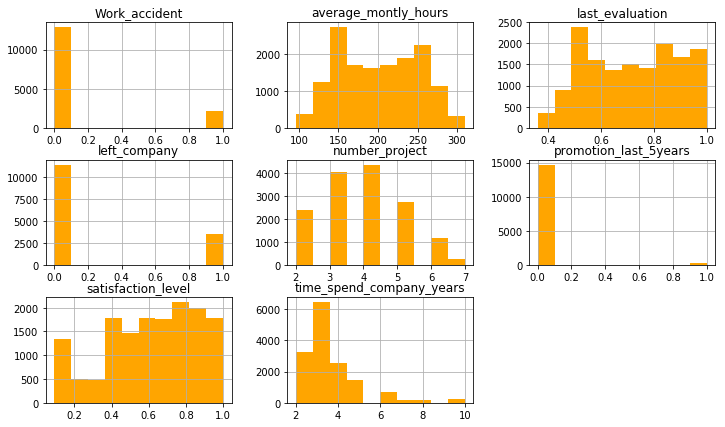

In [10]:
figure1 = matdf.hist(color = 'Orange',figsize = (12,7) )


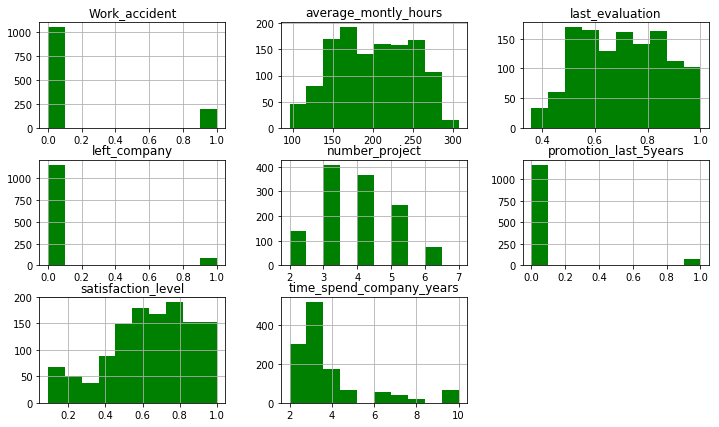

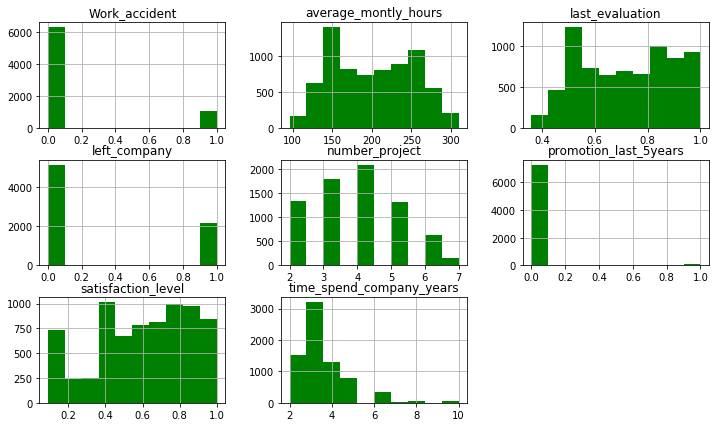

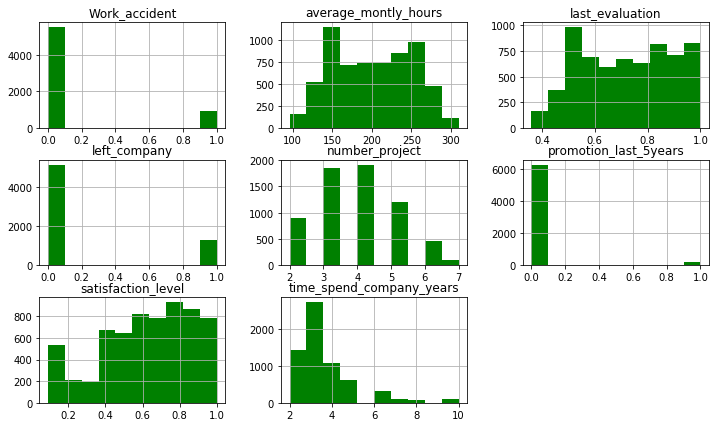

In [11]:
figure = matdf.groupby('salary').hist(color = 'green',figsize=(12,7))

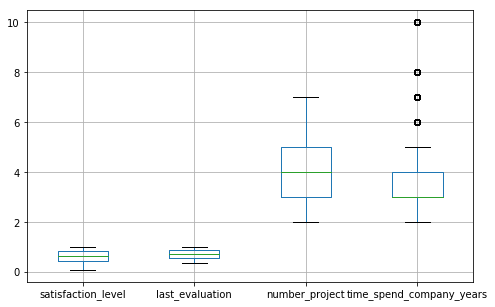

In [12]:
boxplotdf = matdf[["satisfaction_level","last_evaluation","number_project","time_spend_company"]].copy()
figure2 = boxplotdf.boxplot(figsize = (8,5))

#### USING PLOTLY

In [13]:
data2 = df
salary_dept = data2.filter(['salary','department','satisfaction_level'], axis=1)

In [14]:
satList1 = list(salary_dept[(salary_dept['salary']=='low')].groupby('department').mean()['satisfaction_level'])
satList2 = list(salary_dept[(salary_dept['salary']=='medium')].groupby('department').mean()['satisfaction_level'])
satList3 = list(salary_dept[(salary_dept['salary']=='high')].groupby('department').mean()['satisfaction_level'])

In [15]:
SalaryVSDepartment = Heatmap(
    # z should have number of elements equal to y, inner list should have number of elements in x
    z = [satList1,satList2,satList3],
    y = ['low','medium','high'],
    x = ['IT','RandD','accounting','hr','management','marketing','product_mg','sales','support','technical']
)


layout= Layout(
    title= 'Salary and Department against Satisfaction Level (Heat Gradient) of Employees',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Departments',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Salary Level',
        ticklen= 5,
        gridwidth= 2,
    ),

    showlegend= False
)

data1 = [SalaryVSDepartment]
fig_comp = Figure( data=data1, layout=layout)
py.iplot(fig_comp, filename = 'salary-department-satisfaction-online')

In [16]:
labels1 = ['low','medium','high']
salary_dept.groupby('salary').count()
values1 = [7316,6446,1237]

trace1 = Pie(labels=labels1, values=values1)
py.iplot([trace1], filename='salary_pie_chart')


In [257]:
#plot4 - Department strength distribution

labels2 = ['IT','RandD','accounting','hr','management','marketing','product_mg','sales','support','technical']
salary_dept.groupby('department').count()

values2 = [1227,787,767,739,630,858,902,4140,2229,2720]

trace2 = Pie(labels=labels2, values=values2)
py.iplot([trace2], filename='dept_pie_chart')

In [262]:
new_df = df
salaryListLeft = []
salaryListLeft = new_df[(new_df['left']==1)]['salary']

salaryListNotLeft = []
salaryListNotLeft = new_df[(new_df['left']==0)]['salary']

deptListLeft = []
deptListLeft = new_df[(new_df['left']==1)]['department']

deptListNotLeft = []
deptListNotLeft = new_df[(new_df['left']==0)]['department']

avgHoursLeft = []
avgHoursLeft = new_df[(new_df['left']==1)]['average_montly_hours']

avgHoursNotLeft = []

#plot 5 ( two sub plots )

sal_satis = data2.filter(['salary','satisfaction_level'], axis=1)
dep_satis = data2.filter(['department','satisfaction_level'], axis=1)

satis_list = []
satis_list = satList1 + satList2 +satList3
labels3 = satis_list

grouped1 = sal_satis.groupby('satisfaction_level').count()
grouped2 = dep_satis.groupby('satisfaction_level').count()


values4a = []
values4b = []

for satis in grouped1.index:
    values4a = values4a + list(grouped1.loc[satis])
    
for satis in grouped2.index:
    values4b = values4b + list(grouped2.loc[satis])
    

trace1a = {"x": salaryListLeft,
          "y": satis_list,
          "marker": {"color": "pink", "size": 12},
          "mode": "markers",
          "name": "Left",
          "type": "scatter",
}

trace2a = {"x": salaryListNotLeft,
          "y": satis_list,
          "marker": {"color": "blue", "size": 12},
          "mode": "markers",
          "name": "Stayed",
          "type": "scatter"
}

data5 = Data([trace1a, trace2a])
layout5 = {"title": "Employees that Left/Stayed in the company based on Salary and Satisfaction Level",
          "xaxis": {"title": "Salary Level", },
          "yaxis": {"title": "Satisfaction Level"}}

fig5 = Figure(data=data5, layout=layout5)
py.iplot(fig5, filename='basic_dot-plot')

In [264]:
trace1b = {"x": deptListLeft,
          "y": satis_list,
          "marker": {"color": "pink", "size": 12},
          "mode": "markers",
          "name": "Left",
          "type": "scatter",
}

trace2b = {"x": deptListNotLeft,
          "y": satis_list,
          "marker": {"color": "blue", "size": 12},
          "mode": "markers",
          "name": "Stayed",
          "type": "scatter"
}

data6 = Data([trace1b, trace2b])
layout6 = {"title": "Employees that Left/Stayed in the company based on Department and Satisfaction Level",
          "xaxis": {"title": "Department", },
          "yaxis": {"title": "Satisfaction Level"}}


fig6 = Figure(data=data6, layout=layout6)
py.iplot(fig6, filename='basic_dot-plot2')

### PRELIMINARY OBSERVATIONS

##### USING THE HISTOGRAMS 

#### There are highest number of employees with a Satisfaction level of around 0.7
#### Highest number of employees with 4 projects under them.
#### Almost all employees have not received promotions in the last 5 years
#### There are a large number of employees working 250 hours a month

##### USING THE GROUPED HISTOGRAMS 

#### Highest number of people with a MEDIUM salary LEFT the company

##### USING THE BOX PLOTS

#### Most people work for maximum of 5 years

##### USING THE HEATMAP

#### The MARKETING team has a LOW SATISFACTION score inspite of a HIGH salary

##### USING THE PIE CHART

#### Highest number of employees have a LOW salary

##### USING THE SCATTER PLOTS

#### Most people with a LOW salary left the company 

#### Most people in the SALES department left the company 

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 
 
 <b>Least Squares :</b>
 
In Least Squares method, for each of the data points, we measure the vertical distance between the point and the line, square it and add these up. The fitted line would be the one where this sum of distances is minimized as much as possible. 

We use Least Squares method because we are looking for a probabilistic model that fits the observed data best and can be used for future prediction. The least squares model does much better in fitting a curve than many methods such as plotting the average slope of all the slopes between the pait of points ( x E X , t E T )

We find the best possible intercept and slope of a line that fits the observed data best. 
 
 
 
 <b>Least Mean Squares : </b>
 
The Least Squares method is applied to data in a batch and may increase the computation cost when large datasets are fed. We use the Least Mean Square method in such cases which uses the concept of sequential or online learning. Each observation point is fed into the model one by one through a loop using the train_step, and the parameters are updated until it converges to a certain point. In this method, we can process large datasets better than the Least Squares method. 
 
 
 - your implementation and description
 
 
Least Squares Implementation : 

The train() function : 
The input array is first converted to a 2-Dimensional array as the numpy library functions are not compatible with the 
2D arrays. 
The model then computes the Least Squares using a built in library for the Target Variables ( T ) and input data ( X ).
The computed weights are stored in the global variable w. 

The use () fucntion :
Now, the dot product of the weights with the input data is the predicted data. 
The array is first converted to a 2-Dimensional array. 
These predicted values computed using the weights which have the least squares ( minimized error ) is returned by the use function. 

Least Mean Square Implementation : 

The train() function :
N --> stores the number of rows in the DataFrame for the number of loops required.
The input array is first converted to a 2-Dimensional array as the numpy library functions are not compatible with the 
2D arrays. 
If the w variable used to store weights has not been initialized, it is initialized with zeros with the same number of columns.  
A for loop is run for each observation and control is transferred to the train_step fucntion where the weight is computed and updated to the global variable w. 
Once the for loop terminates, the updated weights are returned. 


The train_step() function:

The array is first made 2-Dimensional. 
The train_step function first initializes the array with zeros if empty. 
We multiple the dot product of w and x with a learning rate - alpha so the weights move closer to convergence and update the weight with the new learned value. 
The updated weights are now returned. 

The use() fucntion

Now, the dot product of the weights with the input data is the predicted data. 
The array is first converted to a 2-Dimensional array. 
These predicted values computed using the weights which have the least squares ( minimized error ) is returned by the use function. 



### Super Classs Definition

In [113]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))
        #return np.hstack((np.ones((X.shape[0], 1)), X.reshape((X.shape[0], -1))))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [114]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        
        #N = X.shape[0]
        #code for finding w
        X1 = LinearModel.add_ones(self,X)
        #X1 = np.hstack((np.ones((N, 1)), 
        #X1 = X1.reshape((X.shape[0], -1))))
        LinearModel.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]
        #pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X1 = LinearModel.add_ones(self,X)
        return X1 @ LinearModel.w
        pass  ## TODO: replace this with your codes

### Least Mean Squares

In [122]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        
        N = X.shape[0]
        print(N)
        X1 = self.add_ones(X)
        print(X1)
        if self.w is None:   
            self.w = np.zeros(X1.shape[1])
        for k in range(N):
            
            #y = LinearModel.w @ X1[k, :]
            #error = LinearModel.w @ X1[k,:]
            #error = (np.dot(LinearModel.w,X1[k,:]))
            #print("Error is {}".format(error))
            #print("w before changing {}".format(LinearModel.w))
            #LinearModel.w -= (self.alpha * (error - T[k]) * X1[k, :])
            
            
            self.w = self.train_step( X[k], T[k] )
     
        print("Current Weight is {}".format(self.w))
        return self.w
        
        #print("Training done")
        #pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x1 = np.concatenate([[1],x])
        if self.w is None:    
            self.w = np.zeros(x1.shape[0])
        #x1 = LinearModel.add_ones(self,x)
        self.w -= self.alpha * ((self.w @ x1) - t) * x1
        #error = (np.dot(x1,LinearModel.w) - t)
        #s = self.alpha * ( (error) * x1 )
        #return s
        
        return self.w
        #pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        
        X1 = self.add_ones(X)
        s = np.reshape((X1 @ self.w),(-1,1))
        return s
        #return np.dot(X1,LinearModel.w)
        
        #pass  ## TODO: replace this with your codes
        

### Usage Examples

In [118]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

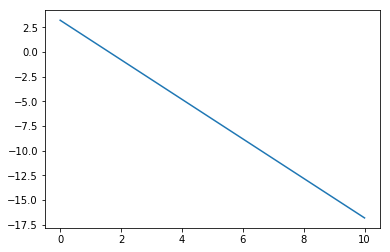

In [109]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

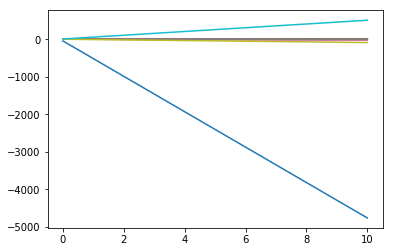

In [110]:
lms = LMS(0.1)

for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

11
[[  1.   0.]
 [  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]]
Current Weight is [  2367.84056128  22226.18529438]


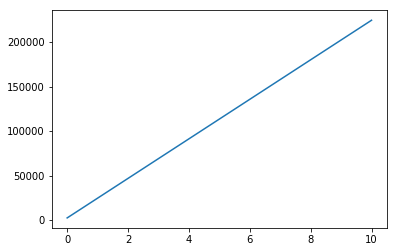

In [111]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply two methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


In [239]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


14999
[[ 1.          0.265625    0.         ...,  0.          0.          0.        ]
 [ 1.          0.78125     0.6        ...,  0.          0.          0.5       ]
 [ 1.          0.8125      1.         ...,  0.          0.          0.5       ]
 ..., 
 [ 1.          0.265625    0.         ...,  0.          0.44444444  0.        ]
 [ 1.          0.9375      0.8        ...,  0.          0.44444444  0.        ]
 [ 1.          0.25        0.         ...,  0.          0.44444444  0.        ]]
Current Weight is [ 0.43118373  0.65949879 -0.68105262 -0.11766334  0.8164391  -0.02841283
 -0.38030706 -0.01543533  0.02664924 -0.00800259]


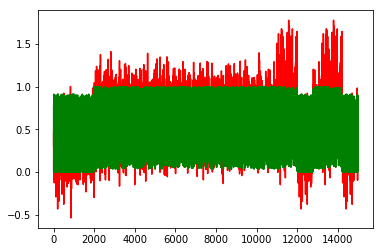

In [187]:
df_norm.head(10)
T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,1:9].copy())
#X = np.sort(X)
y = lmswithoutstep()

In [188]:
y

array([[ 0.29457138],
       [ 0.47042523],
       [ 0.00900545],
       ..., 
       [ 0.31411309],
       [ 0.2391001 ],
       [ 0.29556099]])

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X,T)
p = model.predict(X)
mean_squared_error(p,T)

0.059863363517575992

In [189]:
print("Root Mean Squared Error",np.sqrt(np.mean((T-y)**2)))

Root Mean Squared Error 0.391611537801


#### We first define the different implementations as fucntion calls 

#### Least Mean Squares

In [186]:
#Defining a function to call Least Mean Squares with a learning rate of 0.1

def lmswithoutstep():
    lms = LMS(0.1)
    lms.train(X, T)
    y = lms.use(X)
    plt.plot(lms.use(X),'r')
    plt.plot(T,'g')
    return y

In [126]:
def lmswithstep():
    lms = LMS(0.1)
    for x, t in zip(X, T):
        lms.train_step(x, t)
        plt.plot(lms.use(X))

#### Least Squares

In [251]:
def lsnormal():
    ls = LinearRegress()
    ls.train(X, T)
    plt.plot(ls.use(X))
    plt.plot(T,'g')
    plt.xlim([0, 500])
    return (ls.use(X))
    #plt.ylim([0, 1])

#### Experimenting with the two models for the dataset

In [301]:
df_norm.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0


##### Here we dont use the original dataset, we use the normalized dataset  "df_norm"
<br> 
We take all 9 features and plot it against the target variable 'Satisfaction_Level'
<br>

#### Least  Mean Squares method

14999
[[ 1.          0.265625    0.         ...,  0.          0.          0.        ]
 [ 1.          0.78125     0.6        ...,  0.          0.          0.5       ]
 [ 1.          0.8125      1.         ...,  0.          0.          0.5       ]
 ..., 
 [ 1.          0.265625    0.         ...,  0.          0.44444444  0.        ]
 [ 1.          0.9375      0.8        ...,  0.          0.44444444  0.        ]
 [ 1.          0.25        0.         ...,  0.          0.44444444  0.        ]]
Current Weight is [ 0.43118373  0.65949879 -0.68105262 -0.11766334  0.8164391  -0.02841283
 -0.38030706 -0.01543533  0.02664924 -0.00800259]


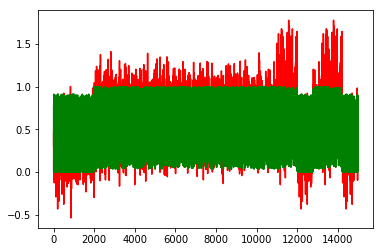

In [276]:
df_norm.head(10)

T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,1:9].copy())
#X = np.sort(X)
y1 = lmswithoutstep()

#### Least Squares Method

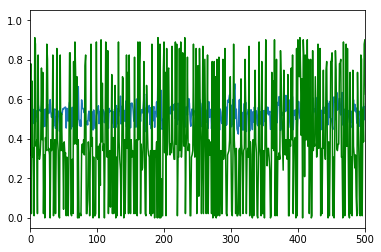

In [277]:
df_norm.head(10)
T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,1:9].copy())
X = np.sort(X)
y2 = lsnormal()

#### Comparing the two models through errors

In [279]:
print("Root Mean Squared Error",np.sqrt(np.mean((T-y1)**2)))
print("Root Mean Squared Error",np.sqrt(np.mean((T-y2)**2)))

from sklearn.metrics import *

print("Mean_Squared_error",mean_squared_error(y1,T))
print("Mean_Squared_error",mean_squared_error(y2,T))

print("Mean_Squared_log_error",mean_squared_log_error(y1,T))
print("Mean_Squared_log_error",mean_squared_log_error(y2,T))


print("R squared score",r2_score(y1,T))
print("R squared score",r2_score(y2,T))

print("Explained_variance_error",explained_variance_score(y1,T))
print("Explained_variance_error",explained_variance_score(y2,T))

Root Mean Squared Error 0.391611537801
Root Mean Squared Error 0.26564652223
Mean_Squared_error 0.104011109139
Mean_Squared_error 0.0705680747731
Mean_Squared_log_error 0.0423810281195
Mean_Squared_log_error 0.0327253400992
R squared score -0.32481805818
R squared score -16.3114244936
Explained_variance_error -0.322201778407
Explained_variance_error -16.3114244936


<b>Conclusion</b> : Even though, the Least Mean Squares model looks ( according to plots) to be more accurate, the Least Squares model is giving a lower mean_squared_error and Root_mean_squared error rate.

<br> <br>
#### Now, We reduce the number of input features to 5

14999
[[ 1.          0.265625    0.          0.28504673  0.125       0.        ]
 [ 1.          0.78125     0.6         0.77570093  0.5         0.        ]
 [ 1.          0.8125      1.          0.82242991  0.25        0.        ]
 ..., 
 [ 1.          0.265625    0.          0.21962617  0.125       0.        ]
 [ 1.          0.9375      0.8         0.85981308  0.25        0.        ]
 [ 1.          0.25        0.          0.28971963  0.125       0.        ]]
Current Weight is [ 0.12318169  0.66689836 -0.66090513 -0.11658894  0.78490201 -0.02145668]


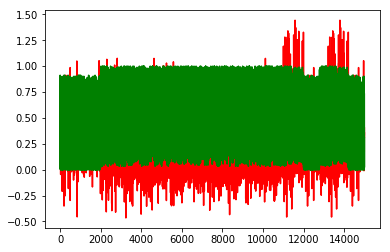

In [280]:
df_norm.head(10)

T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,1:5].copy())
#X = np.sort(X)
y1 = lmswithoutstep()

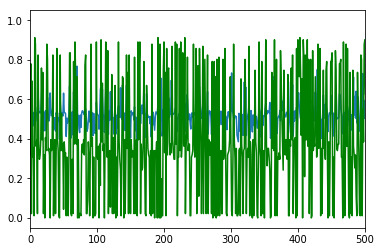

In [281]:
df_norm.head(10)
T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,1:5].copy())
X = np.sort(X)
y2 = lsnormal()

In [282]:
print("Root Mean Squared Error",np.sqrt(np.mean((T-y1)**2)))
print("Root Mean Squared Error",np.sqrt(np.mean((T-y2)**2)))

from sklearn.metrics import *

print("Mean_Squared_error",mean_squared_error(y1,T))
print("Mean_Squared_error",mean_squared_error(y2,T))

print("Mean_Squared_log_error",mean_squared_log_error(y1,T))
print("Mean_Squared_log_error",mean_squared_log_error(y2,T))


print("R squared score",r2_score(y1,T))
print("R squared score",r2_score(y2,T))

print("Explained_variance_error",explained_variance_score(y1,T))
print("Explained_variance_error",explained_variance_score(y2,T))

Root Mean Squared Error 0.429842635765
Root Mean Squared Error 0.262121986448
Mean_Squared_error 0.169641342328
Mean_Squared_error 0.0687079357794
Mean_Squared_log_error 0.0842680168797
Mean_Squared_log_error 0.0318179282854
R squared score -2.01240672771
R squared score -10.5737604491
Explained_variance_error -1.05694637335
Explained_variance_error -10.5737604491


<b>Conclusion</b> : We observe that the error rate has slightly increased when we decrease the number of features from 9 to 5 
<br> <br>
#### We further reduce the input features to 2

14999
[[ 1.     0.     0.125]
 [ 1.     0.6    0.5  ]
 [ 1.     1.     0.25 ]
 ..., 
 [ 1.     0.     0.125]
 [ 1.     0.8    0.25 ]
 [ 1.     0.     0.125]]
Current Weight is [ 0.25471203 -0.30925282  1.08901057]


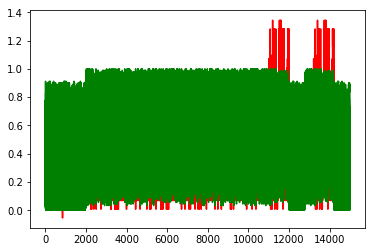

In [283]:
df_norm.head(10)

T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,[2,4]].copy())
#X = np.sort(X)
y1 = lmswithoutstep()

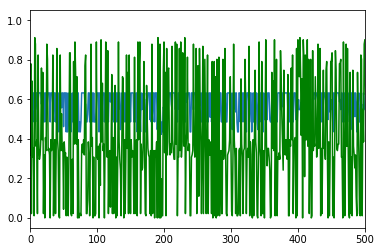

In [284]:
df_norm.head(10)
T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,[2,4]].copy())
X = np.sort(X)
y2 = lsnormal()

In [285]:
print("Root Mean Squared Error",np.sqrt(np.mean((T-y1)**2)))
print("Root Mean Squared Error",np.sqrt(np.mean((T-y2)**2)))

from sklearn.metrics import *

print("Mean_Squared_error",mean_squared_error(y1,T))
print("Mean_Squared_error",mean_squared_error(y2,T))

print("Mean_Squared_log_error",mean_squared_log_error(y1,T))
print("Mean_Squared_log_error",mean_squared_log_error(y2,T))


print("R squared score",r2_score(y1,T))
print("R squared score",r2_score(y2,T))

print("Explained_variance_error",explained_variance_score(y1,T))
print("Explained_variance_error",explained_variance_score(y2,T))

Root Mean Squared Error 0.407072576858
Root Mean Squared Error 0.268229298024
Mean_Squared_error 0.170707102591
Mean_Squared_error 0.0719469563184
Mean_Squared_log_error 0.0781283253899
Mean_Squared_log_error 0.0332362536087
R squared score -3.33791806538
R squared score -25.6716578097
Explained_variance_error -2.02385779122
Explained_variance_error -25.6716578097


<b>Conclusion</b> : We again see an increase in the error rates with the decrease in the number of features. However, the best R^2score and Explained Variance Score is 1 and lower the score, worse the model, therefore in theses metric the Least Mean Square model is performing better on the data.

### We see that the more features that we include, we are improving the accuracy rate of the regression model. Also, we see that the Least Squares model is performing slightly better than the Least Mean Squares model for the given data. 

# Conclusions

Discuss the challenges or somethat that you learned. 

I found the implementation of the Least Mean Squares model to be a little challenging as it took me time to figure out that I have to initilize X with zeros only if it is empty. I was initializing it in every loop which failed all the tests. 

I also found using the data with the model to be a little challenging, as the features had a lot of different units and ranges. The model performed better after completely normalizing the data. 

I learned the proper working of a Linear regression model and also how to build it from scratch. 

I learned how to pre process data before feeding into a training model. 




# References

http://scikit-learn.org/stable/modules/classes.html

https://plot.ly/python/

https://seaborn.pydata.org/

https://www.kaggle.com/ludobenistant/hr-analytics/kernels

# Extra Credit

If you want to work more for an extra credit, place your work here about weight analysis. 
Try to answer to the question: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? 
    
    

In [298]:
import seaborn as sns 
import matplotlib.pyplot as plt
data = df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
department,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


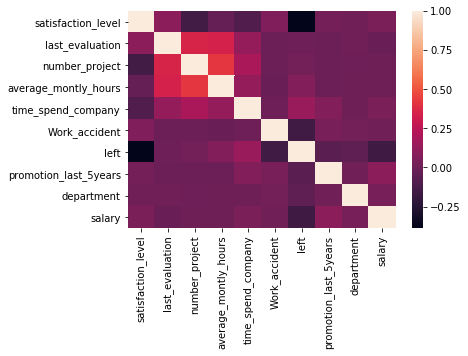

In [293]:


corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

### Using the correlation matrix we observe that the 'Satisfaction_Level' feature has the lowest correlation with the 'Department'.

### We notice 'Satisfaction_Level''s highest positive correlation is with 'Left' ( Whether the employee left the company or not )

### Most significant feature - Left 

### Least significant feature - Department 
<br>


### Removing the most significant attribute - Left

14999
[[ 1.          0.          0.28504673 ...,  0.          0.          0.        ]
 [ 1.          0.6         0.77570093 ...,  0.          0.          0.5       ]
 [ 1.          1.          0.82242991 ...,  0.          0.          0.5       ]
 ..., 
 [ 1.          0.          0.21962617 ...,  0.          0.44444444  0.        ]
 [ 1.          0.8         0.85981308 ...,  0.          0.44444444  0.        ]
 [ 1.          0.          0.28971963 ...,  0.          0.44444444  0.        ]]
Current Weight is [ 0.20874977 -0.420575    0.12450567  1.05791073 -0.02680213 -0.03397123
  0.00847821 -0.00285128]


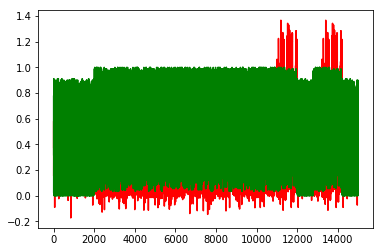

In [303]:
df_norm.head(10)

T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,[2,3,4,5,7,8,9]].copy())
#X = np.sort(X)
y1 = lmswithoutstep()

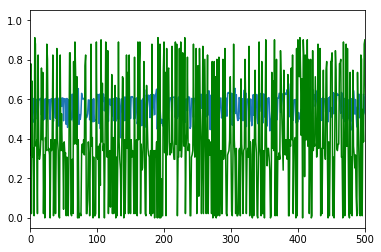

In [305]:
df_norm.head(10)

T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,[2,3,4,5,7,8,9]].copy())
#X = np.sort(X)
y2 = lsnormal()

In [307]:
print("Root Mean Squared Error",np.sqrt(np.mean((T-y1)**2)))
print("Root Mean Squared Error",np.sqrt(np.mean((T-y2)**2)))

from sklearn.metrics import *

print("Mean_Squared_error",mean_squared_error(y1,T))
print("Mean_Squared_error",mean_squared_error(y2,T))

print("Mean_Squared_log_error",mean_squared_log_error(y1,T))
print("Mean_Squared_log_error",mean_squared_log_error(y2,T))


print("R squared score",r2_score(y1,T))
print("R squared score",r2_score(y2,T))

print("Explained_variance_error",explained_variance_score(y1,T))
print("Explained_variance_error",explained_variance_score(y2,T))

Root Mean Squared Error 0.427063544601
Root Mean Squared Error 0.268363808518
Mean_Squared_error 0.185617294188
Mean_Squared_error 0.0720191337223
Mean_Squared_log_error 0.0872246500329
Mean_Squared_log_error 0.0333768350339
R squared score -3.65537029711
R squared score -26.4324267444
Explained_variance_error -1.95322956888
Explained_variance_error -26.4324267444


<b>Errors of the model with the 'LEFT' attribute</b>

Root Mean Squared Error 0.391611537801

Root Mean Squared Error 0.26564652223

Mean_Squared_error 0.104011109139

Mean_Squared_error 0.0705680747731

Mean_Squared_log_error 0.0423810281195

Mean_Squared_log_error 0.0327253400992

R squared score -0.32481805818

R squared score -16.3114244936

Explained_variance_error -0.322201778407

Explained_variance_error -16.3114244936

### We notice that there as in INCREASE in all error rate of all the metrics when the most significant attribute is removed. 

14999
[[ 1.          0.          0.28504673 ...,  1.          0.          0.        ]
 [ 1.          0.6         0.77570093 ...,  1.          0.          0.5       ]
 [ 1.          1.          0.82242991 ...,  1.          0.          0.5       ]
 ..., 
 [ 1.          0.          0.21962617 ...,  1.          0.          0.        ]
 [ 1.          0.8         0.85981308 ...,  1.          0.          0.        ]
 [ 1.          0.          0.28971963 ...,  1.          0.          0.        ]]
Current Weight is [  4.71773902e-01  -4.48079627e-01   1.43087685e-01   1.08430438e+00
  -3.16111623e-02  -3.13311550e-01  -2.41526880e-02   1.63757117e-04]


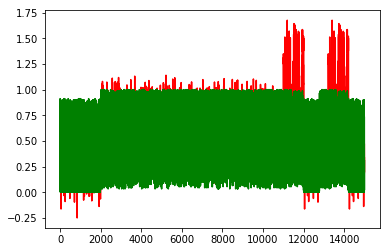

In [309]:
df_norm.head(10)

T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,[2,3,4,5,6,7,9]].copy())
#X = np.sort(X)
y1 = lmswithoutstep()

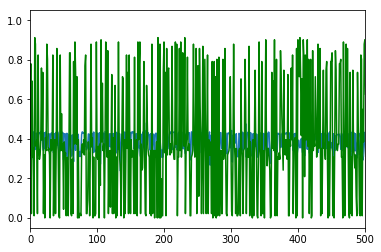

In [311]:
df_norm.head(10)

T = np.array(df_norm.loc[:,0].copy())
X = np.array(df_norm.loc[:,[2,3,4,5,6,7,9]].copy())
#X = np.sort(X)
y2 = lsnormal()

In [313]:
print("Root Mean Squared Error",np.sqrt(np.mean((T-y1)**2)))
print("Root Mean Squared Error",np.sqrt(np.mean((T-y2)**2)))

from sklearn.metrics import *

print("Mean_Squared_error",mean_squared_error(y1,T))
print("Mean_Squared_error",mean_squared_error(y2,T))

print("Mean_Squared_log_error",mean_squared_log_error(y1,T))
print("Mean_Squared_log_error",mean_squared_log_error(y2,T))


print("R squared score",r2_score(y1,T))
print("R squared score",r2_score(y2,T))

print("Explained_variance_error",explained_variance_score(y1,T))
print("Explained_variance_error",explained_variance_score(y2,T))

Root Mean Squared Error 0.363132513519
Root Mean Squared Error 0.248275788308
Mean_Squared_error 0.10659436612
Mean_Squared_error 0.0616408670598
Mean_Squared_log_error 0.0429512013359
Mean_Squared_log_error 0.0281761981616
R squared score -1.04101865275
R squared score -3.74029419941
Explained_variance_error -0.945382523931
Explained_variance_error -3.74029419941


<b>Errors of the model with the 'DEPARTMENT' attribute</b>

Root Mean Squared Error 0.391611537801

Root Mean Squared Error 0.26564652223

Mean_Squared_error 0.104011109139

Mean_Squared_error 0.0705680747731

Mean_Squared_log_error 0.0423810281195

Mean_Squared_log_error 0.0327253400992

R squared score -0.32481805818

R squared score -16.3114244936

Explained_variance_error -0.322201778407

Explained_variance_error -16.3114244936

### We notice that there as in DECREASE in all error rate of all the metrics when the least significant attribute is removed. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [123]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.", a, b)

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
7
[[ 1.  2.  5.]
 [ 1.  6.  2.]
 [ 1.  1.  9.]
 [ 1.  4.  5.]
 [ 1.  6.  3.]
 [ 1.  7.  4.]
 [ 1.  8.  3.]]
Current Weight is [ 0.2700536  3.1637888 -1.4307432]
training  LMS_1STEP ...
---- Testing  LS ... passed. 1.17458028127e-13 1.19e-13
---- Testing  LMS_All ... passed. 2.8753214702 2.8753214702
---- Testing  LMS_1STEP ... passed. 38.0584918251 38.0584918251
